In [1]:
from scipy.io import loadmat
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from featureNormalize import *
from runPca import *
from drawLine import *
from projectData import *
from recoverData import *
from displayData import *

In [2]:
data = loadmat('data2d.mat')
X = data['X']

# Visualize data

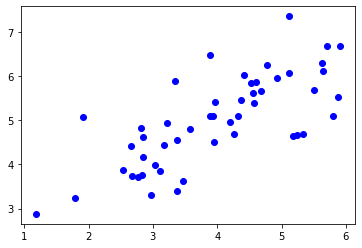

In [3]:
plt.plot(X[:, 0], X[:, 1], 'bo')

# PCA

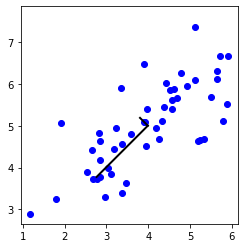

In [4]:
# Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)
# Run PCA
U, S = runPca(X_norm)
# Draw the eigenvectors centered at mean of data. 
# These lines show the directions of maximum variations in the dataset.
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.axis('equal')
plt.axis('square')
for i in range(X_norm.shape[1]):
    drawLine(mu, mu + S[i] * U[:, i].T, color='k', linestyle='-', linewidth=2)

In [5]:
print('Top eigenvector: U[:,1] = {:f} {:f}'.format(*U[:, 0]))
print('(you should expect to see -0.707107 -0.707107)')

Top eigenvector: U[:,1] = -0.707107 -0.707107
(you should expect to see -0.707107 -0.707107)


# Dimension reduction

Projection of the first example: 1.496313
(this value should be about 1.481274)
Approximation of the first example: -1.058053 -1.058053
(this value should be about  -1.047419 -1.047419)


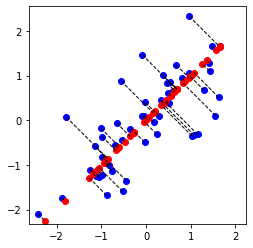

In [6]:
# Plot the normalized dataset (returned from pca)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.axis('equal')
plt.axis('square')
# Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: %f' %(Z[0]))
print('(this value should be about 1.481274)')
X_rec = recoverData(Z, U, K)
print('Approximation of the first example: {:f} {:f}'.format(*X_rec[0, :]))
print('(this value should be about  -1.047419 -1.047419)')
# Draw lines connecting the projected points to the original points
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro')
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i, :], X_rec[i, :], color='k', linestyle='--', linewidth=1) 

# PCA on faces

In [7]:
# Load Face dataset
data_faces = loadmat('faces.mat')
X_faces = data_faces['X']

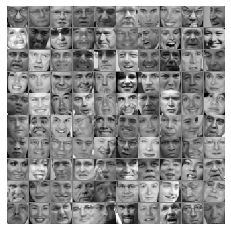

In [8]:
# Display the first 100 faces in the dataset
displayData(X_faces[:100, :], 32, 32)

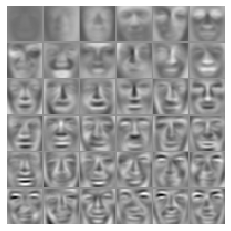

In [9]:
# Before running PCA, it is important to first normalize X by subtracting the mean value from each feature
X_faces_norm, _, _ = featureNormalize(X_faces)
# Run PCA
U_faces, S_faces = runPca(X_faces_norm)
# Visualize the top 36 eigenvectors found
displayData(U_faces[:, :36].T, 32, 32)

The projected data has a size of: 5000 x 100


Text(0.5, 1.0, 'Recovered faces')

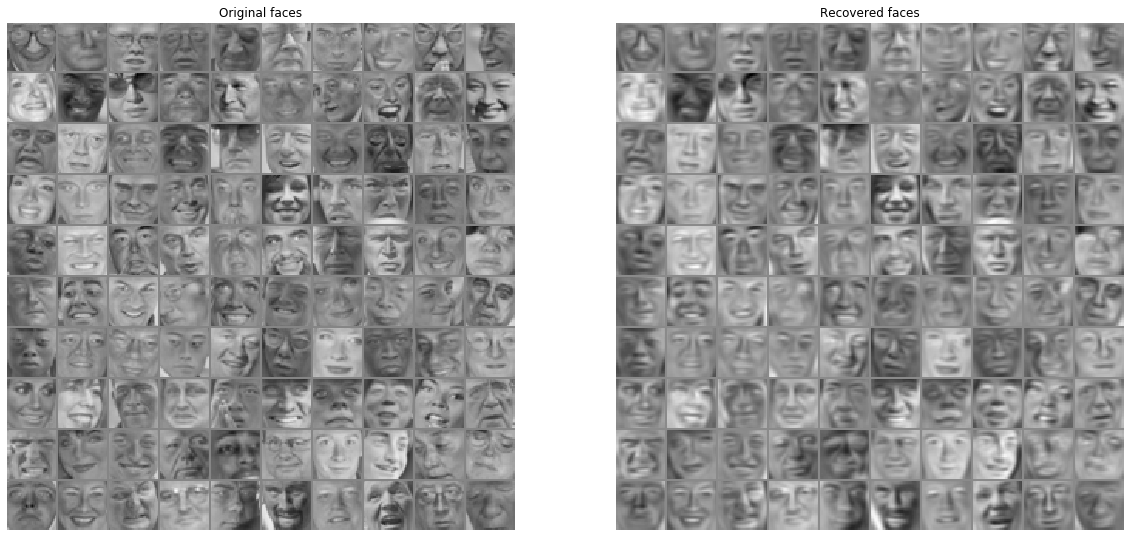

In [10]:
# Dimension reduction
K_faces = 100
Z_faces = projectData(X_faces_norm, U_faces, K_faces)
print('The projected data has a size of: {:d} x {:d}'.format(*Z_faces.shape))
# Visualizing the projected (reduced dimension) faces
X_faces_rec = recoverData(Z_faces, U_faces, K_faces)
plt.subplots(1, 2, figsize=(20, 10))
# Display normalized data
plt.subplot(121)
displayData(X_faces_norm[:100, :], 32, 32)
plt.title('Original faces')
# Display reconstructed data from only k eigenfaces
plt.subplot(122)
displayData(X_faces_rec[:100, :], 32, 32)
plt.title('Recovered faces')

# PCA for visualization

Text(0.5, 1.0, 'Pixel dataset plotted in 2D, using PCA for dimensionality reduction')

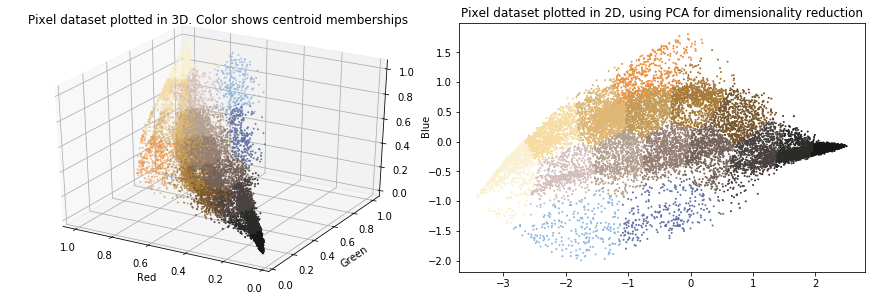

In [11]:
img = plt.imread('bird_small.png')
h, w, c = img.shape
X_bird = img.reshape(h * w, c)
# Visualize the data and k-means centroid memberships in 3D
K_bird = 16
kmeans = KMeans(n_clusters=K_bird).fit(X_bird)
X_comp = kmeans.cluster_centers_[kmeans.labels_]
fig = plt.figure(figsize=(12, 4), constrained_layout=True)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_bird[:, 0], X_bird[:, 1], X_bird[:, 2], s=1, c=X_comp)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue', rotation=90)
ax.invert_xaxis()
ax.set_title('Pixel dataset plotted in 3D. Color shows centroid memberships')
# Use PCA to project this cloud to 2D for visualization
# Subtract the mean to use PCA
X_bird_norm, _, _ = featureNormalize(X_bird)
# PCA and project the data to 2D
U_bird, S_bird = runPca(X_bird_norm)
Z_bird = projectData(X_bird_norm, U_bird, 2)
# Plot in 2D
ax = fig.add_subplot(122)
ax.scatter(Z_bird[:, 0], Z_bird[:, 1], s=1, c=X_comp)
ax.set_title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')

# Advanced optimization algorithms

## Visualize the data in the principal component space

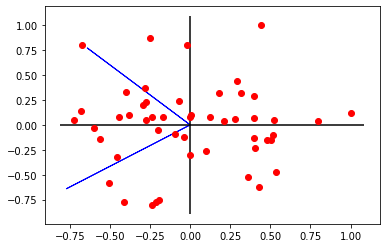

In [12]:
pca = PCA().fit(X)
coeff = pca.components_
scores = pca.transform(X)
plt.plot(scores[:, 0] / scores[:, 0].max(), scores[:, 1] / scores[:, 1].max(), 'ro')
xlim = plt.gca().get_xlim()
plt.hlines(0, xlim[0], xlim[1])
ylim = plt.gca().get_ylim()
plt.vlines(0, ylim[0], ylim[1])
for i in range(X.shape[1]):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='b')

## Visualize the principal components and reconstruct the data in the original space

(0.9416978958723621, 6.189474713216624, 2.3826128989466695, 8.668603729104108)

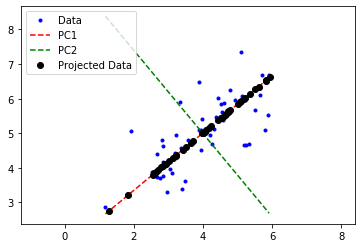

In [13]:
# Plot the data
plt.plot(X[:, 0], X[:, 1], 'b.')
# Plot the principal component directions
mu = pca.mean_
m = coeff[:, 1] / coeff[:, 0]
plt.plot(np.linspace(X[:, 0].min(), X[:, 0].max(), 50), np.linspace(m[0] * (X[:, 0].min() - mu[0]) + mu[1], m[0] * (X[:, 0].max() - mu[0]) + mu[1], 50), 'r--')
plt.plot(np.linspace(X[:, 0].min(), X[:, 0].max(), 50), np.linspace(m[1] * (X[:, 0].min() - mu[0]) + mu[1], m[1] * (X[:, 0].max() - mu[0]) + mu[1], 50), 'g--')
# Plot the reconstructed data
Xrec = scores[:, 0].reshape(-1, 1) @ coeff[0, :].reshape(-1, 1).T + mu
plt.plot(Xrec[:, 0], Xrec[:, 1], 'k.', markersize=12)
plt.legend(['Data', 'PC1', 'PC2', 'Projected Data'], loc='upper left')
plt.axis('equal')

## PCA to compress facial image data

Text(0, 0.5, 'Percentage of variance retained')

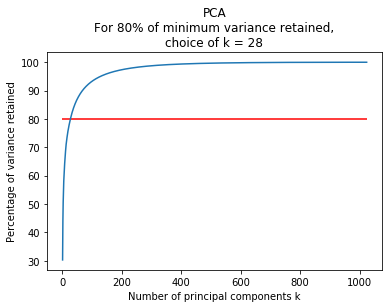

In [14]:
pca_faces = PCA().fit(X_faces)
v = 80
varpct_cum = np.cumsum(pca_faces.explained_variance_ratio_) * 100
kIdx=np.argmax(varpct_cum >= v)
k_rng = range(1, pca_faces.n_components_ + 1)
k = k_rng[kIdx]
plt.plot(k_rng, varpct_cum)
plt.hlines(v, 0, X_faces.shape[1], 'r')
plt.title('PCA\nFor %g%% of minimum variance retained,\nchoice of k = %g' %(v, k))
plt.xlabel('Number of principal components k')
plt.ylabel('Percentage of variance retained')

Text(0.5, 1.0, 'Reconstructed using \n28 principal components\nVariance cutoff: 80%')

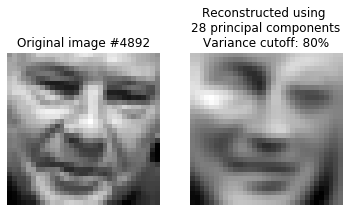

In [15]:
idx = np.random.randint(X_faces.shape[0])
plt.subplots(1,2)
plt.subplot(121)
displayData(X_faces[idx, :].reshape(1, -1), 32, 32)
plt.title('Original image #%d' %(idx + 1))
plt.subplot(122)
Xcomp = pca_faces.transform(X_faces)[:, :k] @ pca_faces.components_[:k, :]
displayData(Xcomp[idx, :].reshape(1, -1), 32, 32)
plt.title('Reconstructed using \n%d principal components\nVariance cutoff: %d%%' %(k, v))